In [1]:
import sklearn
import pandas as pd
import numpy as np
import sys
from sklearn.svm import SVC,SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv('DatabaseA_gallery.csv',index_col=0)
dp=pd.read_csv('DatabaseA_probe.csv',index_col=0)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11255,11256,11257,11258,11259,11260,11261,11262,11263,11264
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.isnull().sum()

0        0
1        0
2        0
3        0
4        0
        ..
11260    0
11261    0
11262    0
11263    0
11264    0
Length: 11265, dtype: int64

In [3]:
X_train=df.iloc[:,1:]
X_test=dp.iloc[:,1:]
y_train=df.iloc[:,0]
y_test=dp.iloc[:,0]

# Decision Tree Classifier

In [7]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtreescore=dtree.score(X_test,y_test)
f=round(dtreescore,2)*100
print(f)
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

60.0


In [10]:
predictions = dtree.predict(X_test)

In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.80      0.82      0.81        60
           3       0.49      0.51      0.50        49
           8       0.27      0.25      0.26        56
          55       0.57      0.57      0.57        54
          94       0.52      0.55      0.53        51
          95       0.53      0.75      0.62        55
          96       0.43      0.53      0.47        53
          98       0.40      0.47      0.43        51
          99       0.50      0.55      0.52        51
         100       0.57      0.39      0.47        61
         101       0.52      0.62      0.56        65
         104       0.88      0.85      0.86        52
         106       0.81      0.68      0.74        56
         111       0.65      0.64      0.64        55
         112       0.47      0.51      0.49        68
         116       0.62      0.47      0.54        53
         117       0.84      0.96      0.89        48
         118       0.52    

# Random Forest Classifier

In [9]:
rfc=RandomForestClassifier(n_estimators=30)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
rfc_pred=rfc.predict(X_test)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99        60
           3       0.84      0.98      0.91        49
           8       0.96      0.88      0.92        56
          55       0.90      0.98      0.94        54
          94       0.74      0.96      0.84        51
          95       1.00      1.00      1.00        55
          96       0.96      0.87      0.91        53
          98       0.96      0.94      0.95        51
          99       0.88      0.98      0.93        51
         100       1.00      0.85      0.92        61
         101       0.89      0.97      0.93        65
         104       0.96      1.00      0.98        52
         106       0.98      0.93      0.95        56
         111       0.98      1.00      0.99        55
         112       0.95      0.78      0.85        68
         116       0.85      0.96      0.90        53
         117       0.94      1.00      0.97        48
         118       0.98    

In [18]:
rfcscore=rfc.score(X_test,y_test)

In [19]:
k=round(rfcscore,2)*100

In [20]:
k

90.0

# KNN Classifier

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [12]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [13]:
knnscore=knn.score(X_test,y_test)


In [29]:
m=round(knnscore,2)*100
print(m)

92.0


In [67]:
prediction = knn.predict(X_test)

In [22]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99        60
           3       0.81      0.98      0.89        49
           8       0.91      0.89      0.90        56
          55       0.89      0.87      0.88        54
          94       0.94      0.88      0.91        51
          95       0.96      1.00      0.98        55
          96       0.92      0.62      0.74        53
          98       0.73      1.00      0.84        51
          99       0.70      0.73      0.71        51
         100       0.96      0.89      0.92        61
         101       0.92      0.92      0.92        65
         104       0.96      0.98      0.97        52
         106       0.89      0.96      0.92        56
         111       1.00      0.78      0.88        55
         112       0.83      0.85      0.84        68
         116       0.98      0.81      0.89        53
         117       0.98      0.96      0.97        48
         118       0.82    

# Roc and Classifiaction Report

In [15]:
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

## Random forest

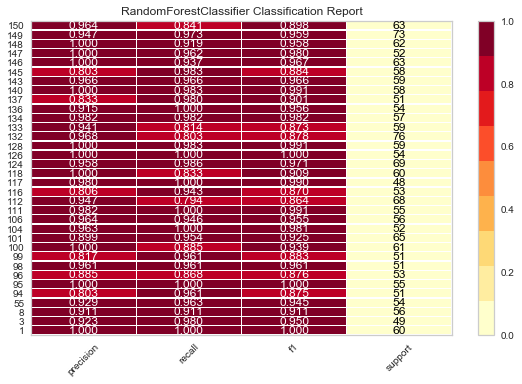

In [72]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(rfc,support=True)
visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()

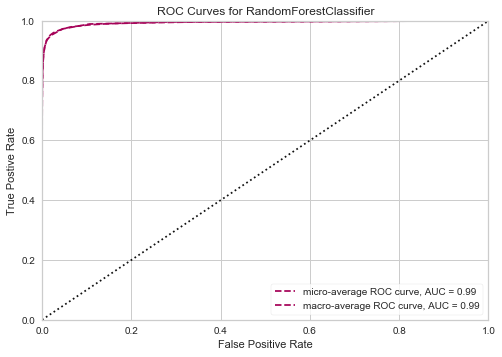

In [19]:
model=RandomForestClassifier(n_estimators=30)
visualizer = ROCAUC(model,per_class=False)
visualizer.fit(X_train,y_train)        # Fit the training data to the visualizer
visualizer.score(X_test,y_test)        # Evaluate the model on the test data
visualizer.show()  


## KNN 

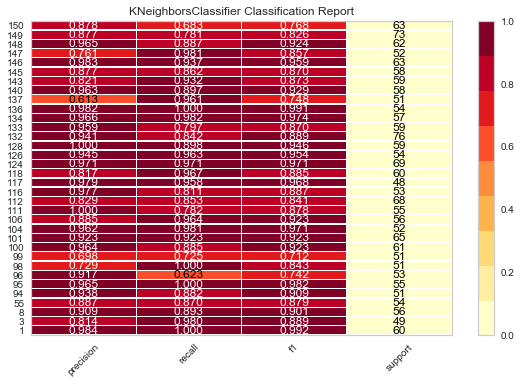

In [74]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(knn,support=True,macro=False)
visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()

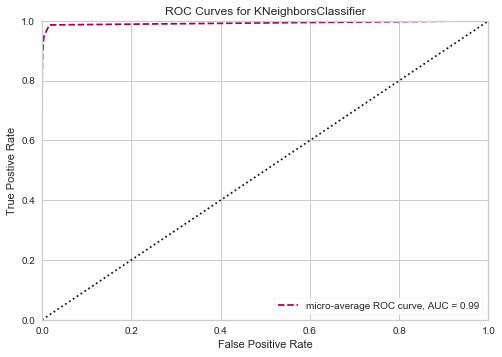

In [17]:
model =KNeighborsClassifier()
visualizer = ROCAUC(model,per_class=False,macro=False)
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

## Decision Tree

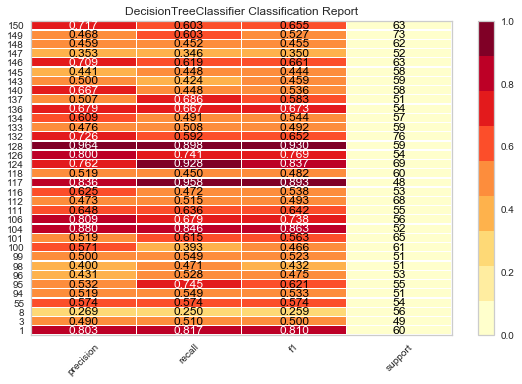

In [76]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(dtree,support=True)

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()

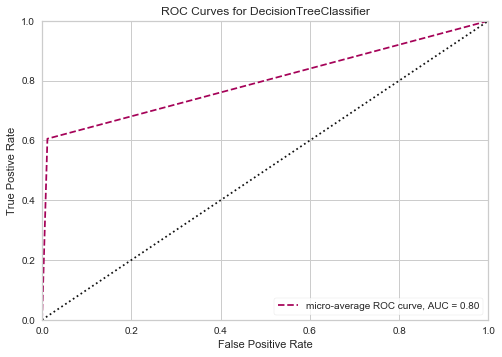

In [18]:
model= DecisionTreeClassifier()
visualizer = ROCAUC(model,per_class=False,macro=False)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

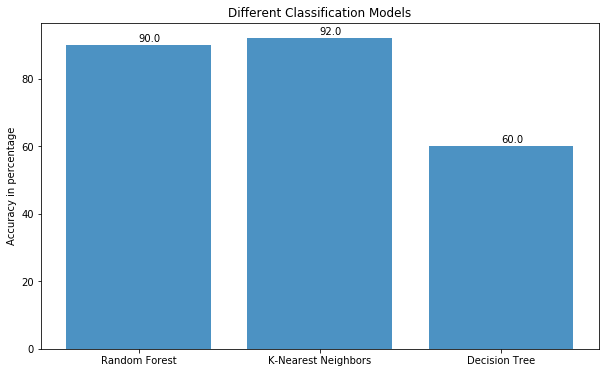

In [47]:
cls=('Random Forest','K-Nearest Neighbors','Decision Tree')
ypos=np.arange(len(cls))
perform=[k,m,f]
labels=[k,m,f]
plt.rcParams['figure.figsize']=(10,6)
plt.bar(ypos,perform,align='center',alpha=0.8)
plt.xticks(ypos,cls)
plt.ylabel('Accuracy in percentage')
plt.title('Different Classification Models')
for i in range(len(ypos)):
    plt.text(x=ypos[i],y=perform[i]+1,s=labels[i],size=10)
plt.show()

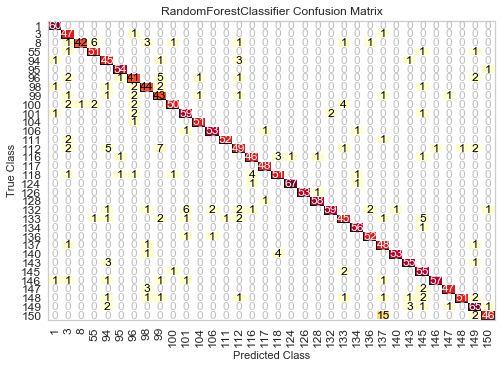

In [10]:
from yellowbrick.classifier import ConfusionMatrix

viz = ConfusionMatrix(RandomForestClassifier(n_estimators=30))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

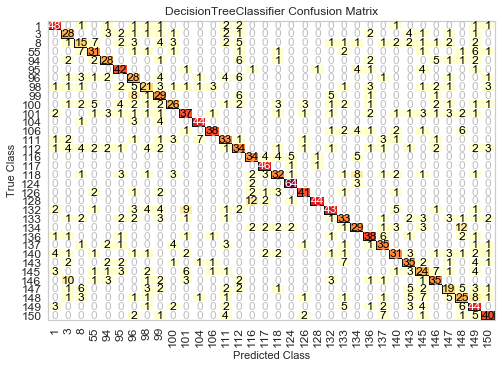

In [28]:
from yellowbrick.classifier import ConfusionMatrix

viz = ConfusionMatrix(DecisionTreeClassifier())
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

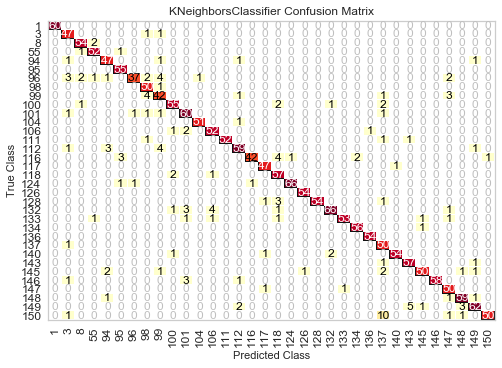

In [29]:
from yellowbrick.classifier import ConfusionMatrix

viz = ConfusionMatrix(KNeighborsClassifier())
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()